# Outlier detection 
--- 
In this notebook, we will detect and visualize outliers 

### Imports

In [ ]:
import polars as pl
import numpy as np
import polars.selectors as cs
from scipy import stats
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

from utils import PathsData, import_data, split_data 
from features import FeaturesFrame

x_validation = import_data(PathsData.X_TEST.value) #! to use in the end to make a submission
x = import_data(PathsData.X_TRAIN.value)
y = import_data(PathsData.Y_TRAIN.value)

x_train, x_test, y_train, y_test = split_data(x=x, y=y)
x_train = FeaturesFrame(x_train).encode_label(encoder='frequency')
x_test = FeaturesFrame(x_test).encode_label(encoder='frequency')

TypeError: FeaturesFrame.encode_label() missing 1 required positional argument: 'encoder'

### Detection

In [ ]:
# by z score
z_scores = np.abs(stats.zscore(x_train.select(cs.numeric()).to_pandas()))
outliers = (z_scores > 3)
# using an Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers_iso = iso.fit_predict(x_train.select(cs.numeric()).to_pandas())

NameError: name 'np' is not defined

#### Visualization

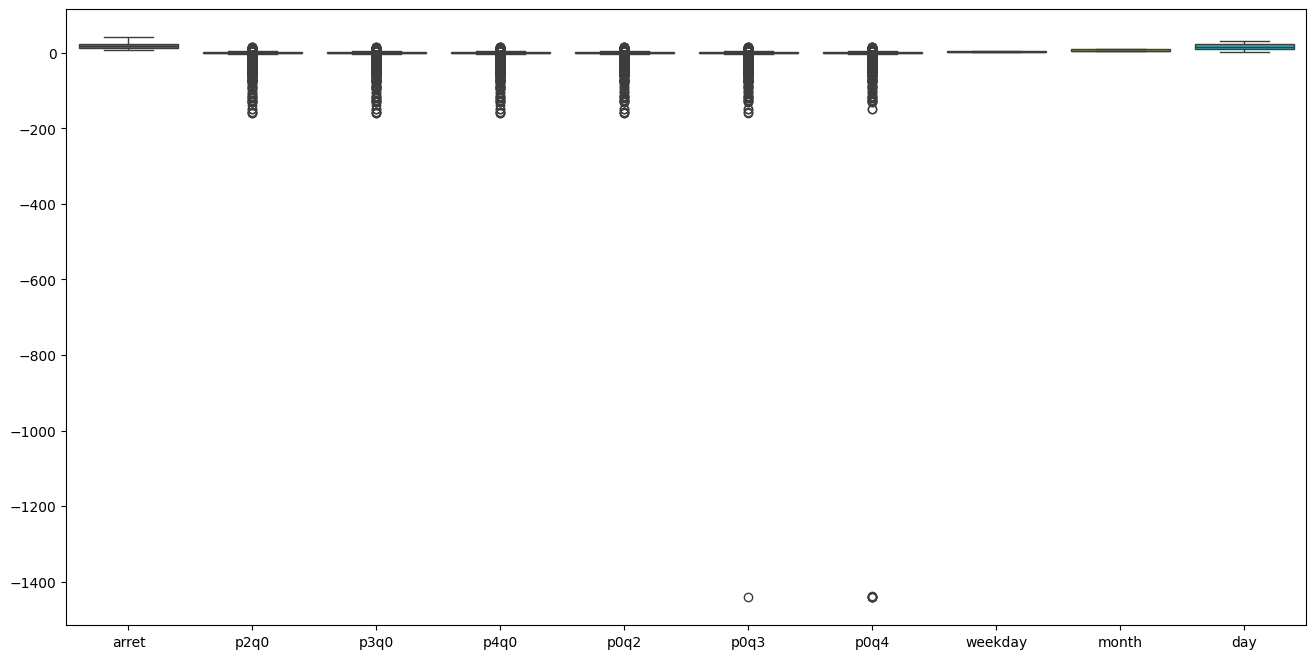

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(data=x_train.drop(cs.contains('encoded')).select(cs.numeric()).to_pandas())